In [1]:
# Importing Necessary libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading in the dataset
# Link to the dataset: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

df = pd.read_csv('/content/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
# Looking at the shape of the dataset
df.shape

(1599, 12)

In [4]:
# Looking at the data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [5]:
# Looking at the basic stats of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [6]:
# Looking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.isnull().values.any()

False

Text(0, 0.5, 'Count')

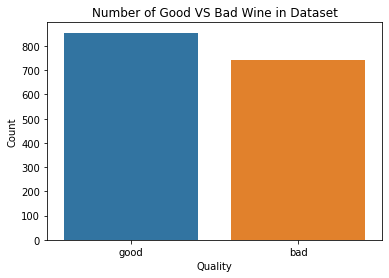

In [8]:
# Looking at what is considered good wine and what is bad wine
quality_count = df['quality'].value_counts()
sns.barplot(x=quality_count.index, y= quality_count.values, alpha = 1)
plt.title('Number of Good VS Bad Wine in Dataset')
plt.xlabel('Quality')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Alcohol Content')

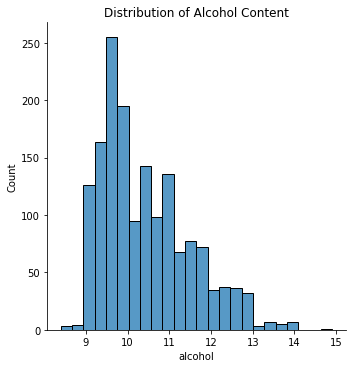

In [9]:
# Looking at the distribution of alcohol content in the wine
sns.displot(x='alcohol', data=df)
plt.title("Distribution of Alcohol Content")

Text(0.5, 1.0, 'Distribution of the pH Level of Wine')

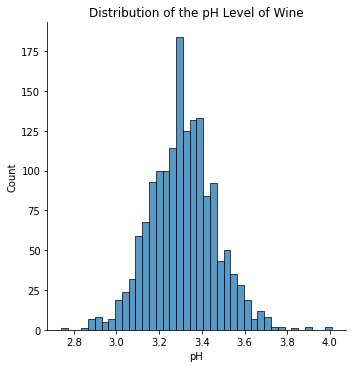

In [10]:
# Looking at the distribution of pH level in wine
sns.displot(x='pH',data=df)
plt.title('Distribution of the pH Level of Wine')

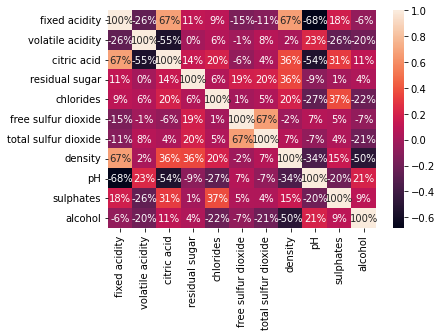

In [11]:
# Making a heatmap for the correlation of the variables in the dataset
sns.heatmap(df.corr(), annot=True, fmt ='.0%')

In [12]:
# One hot coding the Quality column 
pd.get_dummies(df['quality'], drop_first= True)

,good
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [13]:
# Replacing the quality column with the one hot code
df['quality'] = pd.get_dummies(df['quality'], drop_first= True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [14]:
# Getting the features
X= df.iloc[:,:-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [15]:
# Looking at the label
y = df.iloc[:,-1:]
y.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=uint8)

In [16]:
# Splitting the dataset into 70/30 train to test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

In [17]:
# Feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Training the decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
#performing a 5 fold validation for decision tree
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k)
result = cross_val_score(dt, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7328195067264573


In [20]:
# Getting the parameters of the decision tree
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
# Decision Tree making decisions
y_pred_dt = dt.predict(X_test)

In [22]:
# Classification Report of the Decision Tree
print(classification_report(y_test, y_pred_dt, target_names = ['Good', 'Bad']))

              precision    recall  f1-score   support

        Good       0.71      0.72      0.72       217
         Bad       0.77      0.76      0.76       263

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [23]:
# Training a Random Forest classifier 
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [26]:
# performing a 5 fold cross validation for random forest model
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(rf, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7747757847533633


In [24]:
# Random Forest making decisions and classification report
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names = ['Good', 'Bad']))

              precision    recall  f1-score   support

        Good       0.71      0.80      0.75       217
         Bad       0.81      0.73      0.77       263

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480

